In [1]:
import dpp_nets.my_torch as my_torch
import torch
import numpy as np
from dpp_nets.my_torch.controlvar import compute_alpha
import matplotlib.pyplot as plt
from dpp_nets.dpp.score_dpp import score_dpp
from dpp_nets.dpp.sample_dpp import sample_dpp
import dpp_nets.helper.plotting as plot

def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)

network_params = {'emb_in': 80, 'emb_h': 200, 'emb_out': 100,
                  'pred_in': 40, 'pred_h': 100, 'pred_out': 1,
                  'set_size': 40} 
dtype = torch.DoubleTensor

train_iter_base = 200
batch_size = 10
train_iter = batch_size * train_iter_base
sample_iter = 1
alpha_iter = 0
lr = 1e-5
weight_decay = 0
reg_exp = 1
reg_var = 0


In [2]:
alpha_iter = 0
overwrite = 0

set_seed(10)
baseline_0 = my_torch.DPPRegressor(network_params, dtype)

Number of different clusters was:  10
Number of clusters predicted was:  -8.679116218726312
Resultant loss was:  348.9093827126844
Retrieved subset was of size:  23
Number of clusters detected by DPP was:  10


In [3]:
baseline_0.train_with_baseline(1000, 25, sample_iter, alpha_iter, lr, weight_decay, reg_exp, reg_var, overwrite)
baseline_0.evaluate(1000)

50 240.99387781065977
100 6.351012095764775
150 11.715031746470446
200 172.65057421226228
250 29.162222449454713
300 263.61890711458807
350 52.9211962610844
400 29.36632678331174
450 68.50574589183982
500 170.74664003676767
550 1.140205907244019
600 11.242792220531918
650 43.45937380746334
700 8.9257322955454
750 3.065530209358768
800 0.06536397005261355
850 66.87742432518766
900 29.998579584430942
950 27.84050303647684
1000 26.442737834344037
Average Loss is:  52.339647229115315
Average Subset Size:  22.99
Subset Variance:  0.5554962260155404
Proportion of true clusters retrieved: 0.9973454683352294


In [ ]:
alpha_iter = 0
overwrite = 500

set_seed(10)
baseline_500 = my_torch.DPPRegressor(network_params, dtype)
baseline_500.sample()

set_seed(13)
baseline_500.train_with_baseline(train_iter, batch_size, sample_iter, alpha_iter, lr, weight_decay, reg_exp, reg_var, overwrite)
baseline_500.evaluate(1000)

In [ ]:
alpha_iter = 5
overwrite = 0
reg_exp = 10
batch_size = 20
lr = 1e-6
reg_exp = 1000
set_seed(10)
model = my_torch.DPPRegressor(network_params, dtype)
model.sample()

set_seed(13)
model.train_with_baseline(train_iter, batch_size, sample_iter, alpha_iter, lr, weight_decay, reg_exp, reg_var, overwrite)
model.evaluate(1000)

In [77]:
clusters


  2
 15
  3
 27
  1
  9
 32
 21
 38
 27
  9
  1
 30
 29
 38
 17
  6
 26
 15
 19
 29
 18
  0
 18
  1
 26
 32
 14
  6
 30
  6
 21
  3
 14
 19
  2
  9
  0
  2
 17
[torch.DoubleTensor of size 40]

Number of different clusters was:  18
Number of clusters predicted was:  13.825678909075188
Resultant loss was:  17.42495657013971
Retrieved subset was of size:  28
Number of clusters detected by DPP was:  18


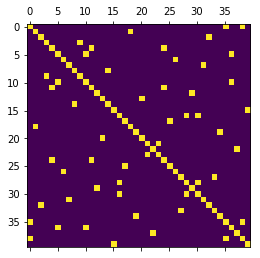

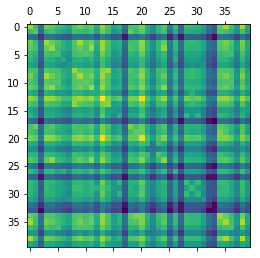

In [58]:
_, _, clusters = baseline_0.sample()
plot.plot_matrix(plot.gen_matrix_from_cluster_ix(clusters))
plot.plot_embd(baseline_0.embedding.data)

In [122]:
(pred, target), (words, context), clusters = baseline_0.sample()

Number of different clusters was:  9
Number of clusters predicted was:  15.310236270463857
Resultant loss was:  39.81908178907761
Retrieved subset was of size:  27
Number of clusters detected by DPP was:  9


In [127]:
words.sum(0).size()

torch.Size([1, 40])

In [124]:
clusters


 32
 39
  8
 39
  0
  8
 36
 32
  8
 36
 25
 36
 25
 39
  0
 34
 22
 24
 34
  8
 24
 22
 22
 32
 24
 22
 34
 25
 39
 32
  0
 34
 22
 32
 24
 36
 36
  0
  0
 25
[torch.DoubleTensor of size 40]

In [33]:
A = torch.randn(2,2)

In [36]:
A.mean()

1.0681482404470444

In [37]:
A.mean(dim=0)


 1.8996  0.2367
[torch.FloatTensor of size 1x2]

In [41]:
A.mean(dim=1).expand_as(A)


 1.1831  1.1831
 0.9532  0.9532
[torch.FloatTensor of size 2x2]

In [40]:
A


 0.9229  1.4433
 2.8763 -0.9700
[torch.FloatTensor of size 2x2]

In [80]:
import dpp_nets.dpp as dpp
mat = plot.gen_matrix_from_cluster_ix(clusters).astype(float)

In [91]:
e_val, e_vec = np.linalg.eig(1e40 * mat)

In [92]:
e_val = np.real(e_val)
e_vec = np.real(e_vec)

In [93]:
dpp.sample_dpp(e_val, e_vec)

/Users/Max/Coding/git/dpp_nets/dpp_nets/dpp/sample_dpp.py:40: RuntimeWarning: invalid value encountered in true_divide
  items = list()
/Users/Max/Coding/git/dpp_nets/dpp_nets/dpp/sample_dpp.py:41: RuntimeWarning: invalid value encountered in greater_equal
  


ValueError: attempt to get argmax of an empty sequence

In [98]:
np.linalg.eig(np.array([[1,1,0,0],[1,1,0,0],[0,0,1,1],[0,0,1,1]]))

(array([ 2.,  0.,  2.,  0.]),
 array([[ 0.70710678, -0.70710678,  0.        ,  0.        ],
        [ 0.70710678,  0.70710678,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.70710678, -0.70710678],
        [ 0.        ,  0.        ,  0.70710678,  0.70710678]]))

In [104]:
val, vec = np.linalg.eig(np.array([[1,1,1,0,0,0],[1,1,1,0,0,0],[1,1,1,0,0,0],[0,0,0,1,1,0],[0,0,0,1,1,0],[0,0,0,0,0,1]]))

In [112]:
val

array([ -2.22044605e-16,   3.00000000e+00,   0.00000000e+00,
         2.00000000e+00,   0.00000000e+00,   1.00000000e+00])

In [116]:
vec[1]

array([ 0.40824829,  0.57735027, -0.70710678,  0.        ,  0.        ,  0.        ])

In [117]:
torch.Tensor(3)


1.00000e-19 *
  0.0000
  1.0842
 -0.0000
[torch.FloatTensor of size 3]

In [121]:
torch.Tensor([torch.mean(torch.stack([torch.Tensor([3]),torch.Tensor([5]),torch.Tensor([4])]))])


 4
[torch.FloatTensor of size 1]